# Objective:-Prepare a classification model using SVM for salary data

In [2]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [35]:
data_train=pd.read_csv("D:\\Data sets\\SalaryData_Train.csv")
data_test=pd.read_csv("D:\\Data sets\\SalaryData_Test.csv")

In [36]:
data_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [37]:
data_test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [69]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [70]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

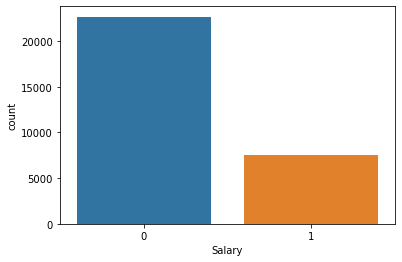

In [72]:
import seaborn as sns
sns.countplot(data_train["Salary"])

In [40]:
from sklearn.preprocessing import LabelEncoder
data_train = data_train.apply(LabelEncoder().fit_transform)
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [42]:
data_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
data_test = data_test.apply(LabelEncoder().fit_transform)
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [45]:
data_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [55]:
X_train= data_train.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y_train= data_train['Salary']
print(np.unique(Y_train))
X_train.head()

[0 1]


,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,24,0,39,0
1,33,12,0,0,12,0
2,21,8,0,0,39,0
3,36,6,0,0,39,0
4,11,12,0,0,39,0


In [58]:
X_test= data_test.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y_test= data_test['Salary']
print(np.unique(Y_test))
X_test.head()

[0 1]


,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,0,0,39,0
1,21,8,0,0,49,0
2,11,11,0,0,39,1
3,27,9,87,0,39,1
4,17,5,0,0,29,0


In [62]:
X_train.shape,Y_train.shape

((30161, 6), (30161,))

In [63]:
X_test.shape,Y_test.shape

((15060, 6), (15060,))

In [64]:
# Linear Support Vector Machine
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9285524568393094


In [65]:
# Radical Support Vector Machine
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.9285524568393094


In [66]:
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='sigmoid',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_radical)

The accuracy of sigmoid SVC Model is 0.7543160690571049


In [67]:
from sklearn.svm import SVC
svc = SVC(gamma=0.33)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9219123505976096


In [68]:
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='poly',C=1,gamma=0.33)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of poly SVC Model is', score_svc_radical) 

The accuracy of poly SVC Model is 0.999933598937583


In [79]:
clf = SVC(kernel='poly',C=1,gamma=0.33)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 99.99335989375831


array([[11360,     0],
       [    1,  3699]], dtype=int64)

In [1]:
print(classification_report(Y_test, y_pred))

NameError: name 'classification_report' is not defined

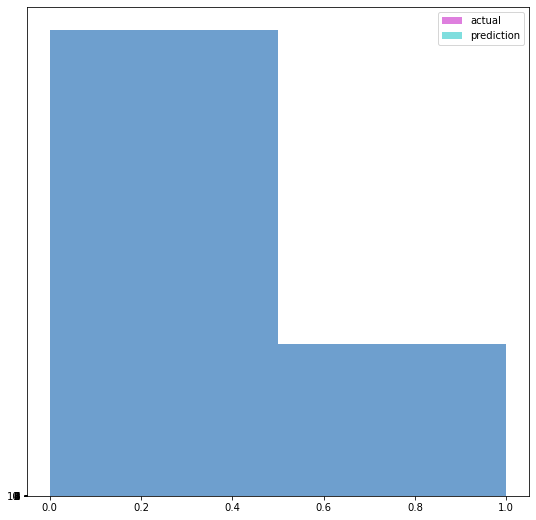

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins=2)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Conclusion:-Poly SVC model is predict the test dataset with 99% accuracy